# Lab 7
Seuillage global et adaptatif.

In [20]:
import matplotlib.pyplot as plt
import skimage.filters
from skimage import data
from skimage import filters
import numpy as np
from scipy import ndimage as ndi
from skimage.segmentation import watershed
import skimage

## Exercice 1
Segmenter l'avant-plan de l'image avec le threshold d'Otsu. Avec le masque obtenu, retirer l'arrière-plan de l'image et afficher la.
> Utiliser la fonction `skimage.filters.threshold_otsu`

img dtype = uint8


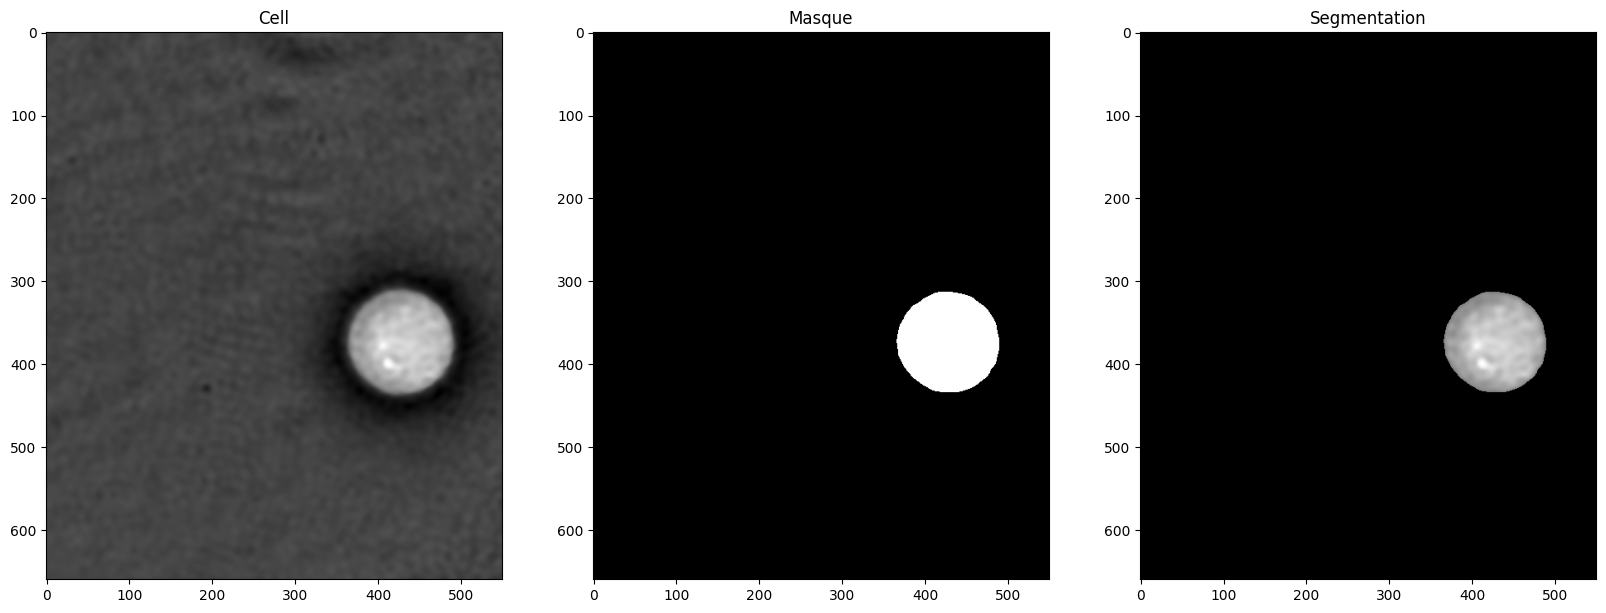

In [11]:
img = data.cell()
plt.figure(figsize=(20, 20))
plt.subplot(131); plt.imshow(img, cmap='gray'); plt.title('Cell')
print(f'img dtype = {img.dtype}')

mask_otsu = filters.threshold_otsu(img)
mask = img > mask_otsu

plt.subplot(132); plt.imshow(mask, cmap='gray'); plt.title('Masque')

seg = img.copy() * mask
plt.subplot(133); plt.imshow(seg, cmap='gray'); plt.title('Segmentation')

plt.show()

## Exercice 2
Segmenter l'arrière-plan de l'image avec le threshold de Li. Avec le masque obtenu, retirer l'avant-plan de l'image et afficher l'arrière-plan..
> Utiliser la fonction `skimage.filters.threshold_li`

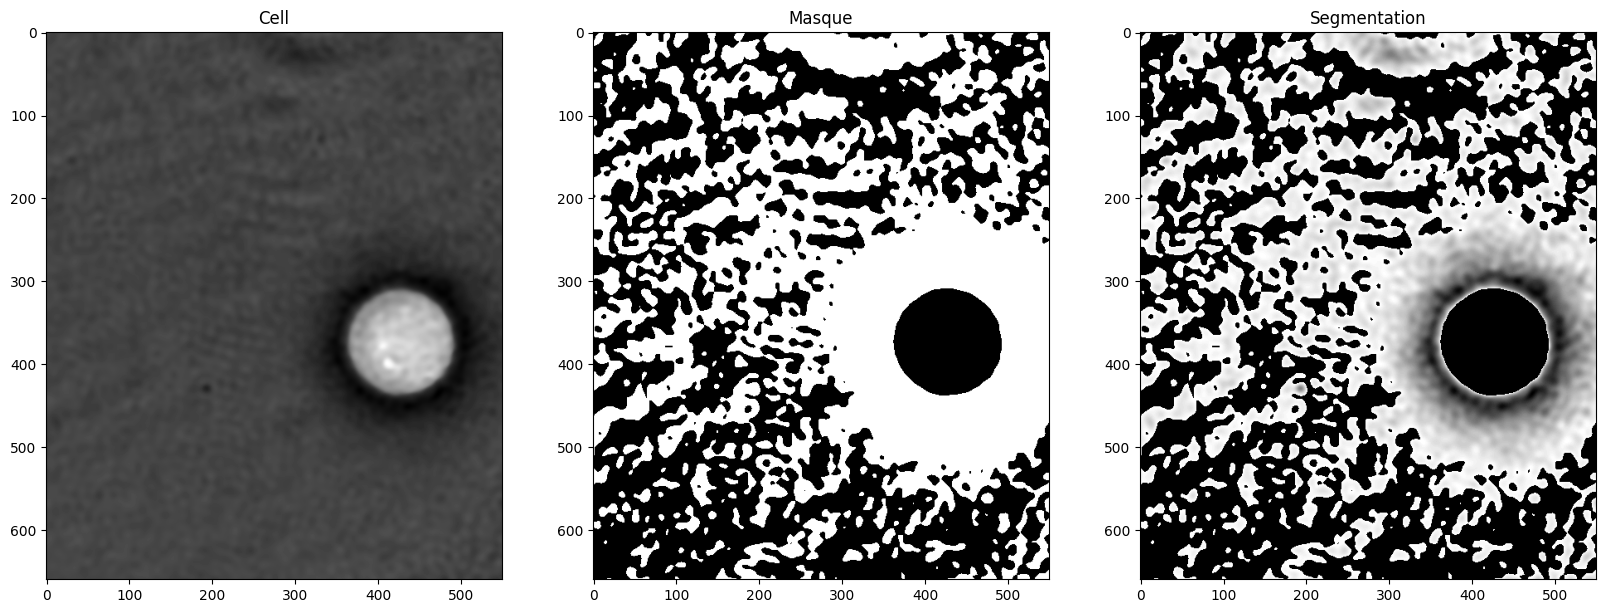

In [19]:
plt.figure(figsize=(20, 20))
plt.subplot(131); plt.imshow(img, cmap='gray'); plt.title('Cell')

mask_li = filters.threshold_li(img)

threshold = img < mask_li
plt.subplot(132); plt.imshow(threshold, cmap='gray'); plt.title('Masque')

seg = img.copy() * threshold
plt.subplot(133); plt.imshow(seg, cmap='gray'); plt.title('Segmentation')

plt.show()

## Exercice 3
Segmenter l'arrière-avant de l'image en suivant ces étapes:
- Trouver les coutours avec Sobel (`skimage.filters.sobel`)
- Utiliser la méthode watershed avec le `markers` déjà définit et les coutours trouver avec Sobel comme carte d'élévation (`skimage.segmentation.watershed`)
> Pris de https://scikit-image.org/docs/dev/auto_examples/applications/plot_coins_segmentation.html#sphx-glr-auto-examples-applications-plot-coins-segmentation-py

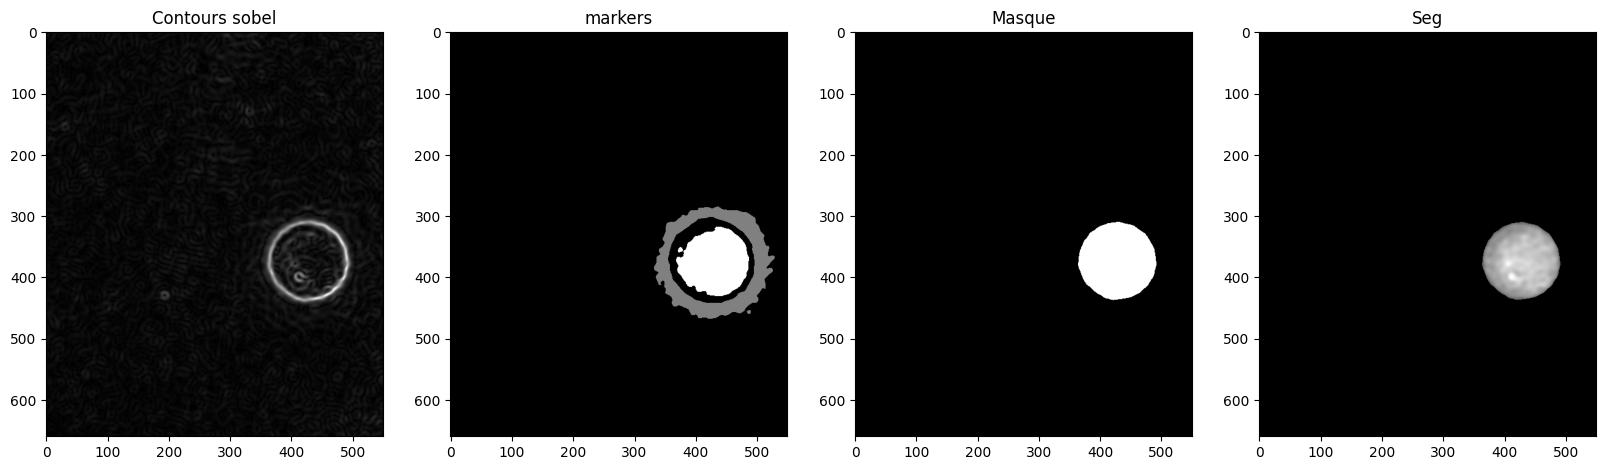

In [29]:
plt.figure(figsize=(20, 15))

contour = filters.sobel(img)
plt.subplot(141); plt.imshow(contour, cmap='gray'); plt.title('Contours sobel')


markers = np.zeros_like(img)
# Seuillage a la main pour l'annotation
markers[img < 30] = 1
markers[img > 150] = 2
plt.subplot(142); plt.imshow(markers, cmap='gray'); plt.title('markers')


masque = skimage.segmentation.watershed(contour, markers)
masque = masque - masque.min()
plt.subplot(143); plt.imshow(masque, cmap='gray'); plt.title('Masque')


seg = img.copy()
seg = seg * masque
plt.subplot(144); plt.imshow(seg, cmap='gray'); plt.title('Seg')

plt.show()
